<a href="https://colab.research.google.com/github/KeerthanaAjith/Machine-Learning-Assignments/blob/main/Lab_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('/content/_annotations.csv')
df.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,a_846_jpg.rf.16ae5101af82219ebb320a9848f8ad80.jpg,720,404,6,138,11,295,211
1,a_144_jpg.rf.1e2dff958e04ae1f6ce93627c8ef281a.jpg,720,404,11,135,285,278,375
2,a_124_jpg.rf.157aebd9cf9c92cc819b6ec92a7183fd.jpg,720,404,10,222,316,437,402
3,no_9_jpg.rf.207063dcdefd0a9c4c30d682c6bb5d9b.jpg,2304,1440,10,864,980,1424,1206
4,surgery_5_jpg.rf.14697c20b72556a364ce21b3ab930...,2304,1440,13,1129,750,1516,994
5,a_933_jpg.rf.14b069909e8faef35f91cf0173c84bf0.jpg,720,404,11,172,212,268,276
6,a_311_jpg.rf.2544fe462a2807b99b05fedaf5c49e72.jpg,720,404,6,160,34,334,252
7,a_123_jpg.rf.2389dca6f0653e955bb7d04f5a585037.jpg,720,404,10,231,269,426,386
8,a_173_jpg.rf.23ff24582f38cad8e1126017b5688029.jpg,720,404,13,290,254,453,404
9,a_899_jpg.rf.23dff9b5995099519d4478f0c89342ee.jpg,720,404,9,285,169,390,297


In [ ]:
mean_of_width = df['width'].mean()
mean_of_height = df['height'].mean()
mean_of_class = df['class'].mean()
mean_of_xmin = df['xmin'].mean()
mean_of_ymin = df['ymin'].mean()
mean_of_xmax = df['xmax'].mean()
mean_of_ymax = df['ymax'].mean()

print(f"Mean of width: {mean_of_width}, height :{mean_of_height}, class :{mean_of_class}, xmin :{mean_of_xmin}, ymin :{mean_of_ymin}, xmax :{mean_of_xmax}, ymax :{mean_of_ymax}")

Mean of width: 1191.6404494382023, height :712.4719101123595, class :7.544943820224719, xmin :444.2022471910112, ymin :311.89325842696627, xmax :646.6910112359551, ymax :516.4662921348314


In [ ]:
width_SD = np.std(df['width'])
height_SD = np.std(df['height'])
class_SD = np.std(df['class'])
xmin_SD =np.std(df['xmin'])
ymin_SD =np.std(df['ymin'])
xmax_SD =np.std(df['xmax'])
ymax_SD =np.std(df['ymax'])

print(f"Standard Deviation of width: {width_SD}, height :{height_SD}, class :{class_SD}, xmin :{xmin_SD}, ymin :{ymin_SD}, xmax :{xmax_SD}, ymax :{ymax_SD}")

Standard Deviation of width: 724.3160624781443, height :473.73197015616, class :4.0972314915952985, xmin :329.2429921199822, ymin :247.5994065710305, xmax :413.87057634500417, ymax :329.8411117131086


In [ ]:
class_m = df.groupby('class')[['xmin', 'ymin', 'xmax', 'ymax']].mean()

print(class_m)

class_1 = 10
class_2 = 11

centroid_1 = class_m.loc[class_1].values
centroid_2 = class_m.loc[class_2].values
dist = np.linalg.norm(centroid_1 - centroid_2)

print(f"Distance between class {class_1} and class {class_2} centroids: {dist}")

             xmin        ymin        xmax        ymax
class                                                
0      461.500000  262.750000  633.500000  399.500000
1      508.615385  373.692308  720.384615  587.538462
2      473.363636  594.000000  946.727273  753.636364
3      498.800000  373.600000  625.800000  569.000000
4      381.900000  123.100000  528.400000  259.800000
5      524.500000  211.666667  634.500000  522.583333
6      293.882353   76.294118  493.000000  389.000000
7      359.857143  257.857143  510.142857  460.571429
8      558.571429  301.857143  797.928571  530.428571
9      468.000000  353.562500  638.875000  539.125000
10     363.875000  448.125000  688.625000  581.625000
11     350.857143  434.928571  481.000000  562.428571
12     773.000000  405.222222  981.777778  867.111111
13     384.818182  280.636364  582.363636  412.909091
Distance between class 10 and class 11 centroids: 209.33287803527332


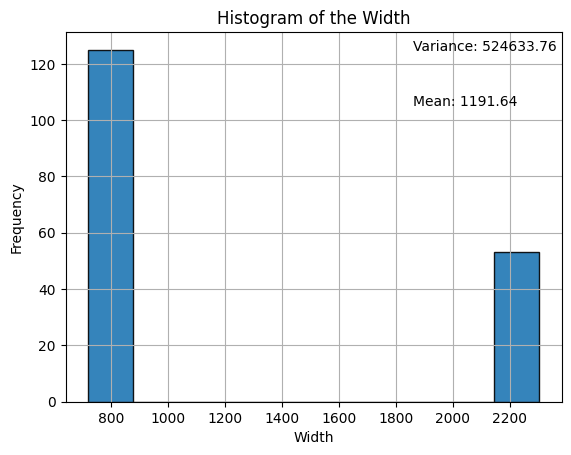

In [ ]:
width_val = df['width']
width_val

hist, bins = np.histogram(width_val, bins=10)

mean_width = np.mean(width_val)
variance_width = np.var(width_val)

plt.text(0.7, 0.8, f'Mean: {mean_width:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.95, f'Variance: {variance_width:.2f}', transform=plt.gca().transAxes)

plt.hist(width_val, bins=10, edgecolor='black', alpha=0.9)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of the Width')
plt.grid(True)

plt.show()

<ipython-input-32-272bc81a1200>:7: RuntimeWarning: invalid value encountered in double_scalars
  distance = np.power(np.abs(vect1 - vect2), r).sum() ** (1 / r)


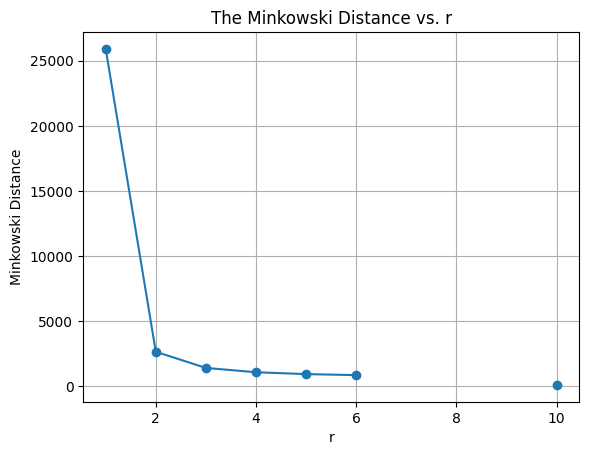

In [ ]:
vect1 = df['xmax']
vect2 = df['ymax']

distances = []
r_val = np.arange(1, 11)
for r in r_val:
    distance = np.power(np.abs(vect1 - vect2), r).sum() ** (1 / r)
    distances.append(distance)

plt.plot(r_val, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('The Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

list = ['width','height','xmin','ymin','xmax','ymax']
a = df[list]
b = df["class"]

a_train , a_test ,b_train  , b_test   = train_test_split(a,b,test_size=0.3)


print(f"a_train :{a_train}")
print(f"a_test :{a_test}")
print(f"b_train :{b_train}")
print(f"b_test :{b_test}")

a_train :     width  height  xmin  ymin  xmax  ymax
151    720     404   216   165   286   310
137    720     404   262   126   385   290
39    2304    1440   851   962  1512  1220
78     720     404   239   277   390   385
74     720     404   141    29   302   264
..     ...     ...   ...   ...   ...   ...
86    2304    1440   769   308  1068   572
0      720     404   138    11   295   211
150    720     404   319   188   411   272
102    720     404   205   112   367   336
12     720     404   165   268   269   360

[124 rows x 6 columns]
a_test :     width  height  xmin  ymin  xmax  ymax
124    720     404   163    74   279   299
98    2304    1440   835   974  1440  1214
95     720     404   266   159   375   296
22    2304    1440   949   698  1257  1006
130   2304    1440   986   368  1134   830
58     720     404   286   182   363   308
106   2304    1440   952   700  1249   998
112   2304    1440  1008   804  1301  1104
57     720     404   253   133   390   283
127    720   

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=3)

neighbor.fit(a,b)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
neighbor_score_k3 = neighbor.score(a_test, b_test)
print(neighbor_score_k3)

0.9074074074074074


In [ ]:
print(neighbor.predict(a_test))

[ 5 10  3  1  5  3  1  9  1  3  8  4 11  4 13 13  5  3  1  9  7 11  1  8
 13  1  3  3 13 12 11  9  5  4  4  2  1  8  6  8  2 13  6 13  4  9 11  4
  5  6  5  6 13  6]


[ 5 10  7  1  5  3  1  9  1  3  8  4 11  4 13 13  5  3  1  9  7 11  0  8
 13  1  3  3 13 12 11  9  5  4  4 10  1  8  6 13  2 13  6 13  4  9 11  4
  5  6  6  6 13  6]
Accuracy prediction of : k=1: 1.0 and for k=3: 0.9074074074074074


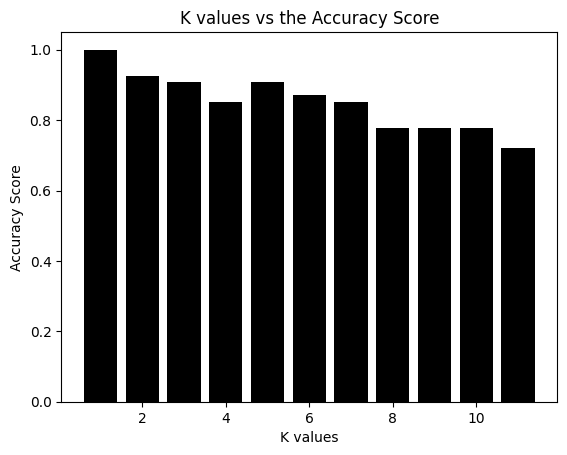

In [ ]:
neighbor = KNeighborsClassifier(n_neighbors=1)
neighbor.fit(a, b)
neighbor_score_k1=neighbor.score(a_test, b_test)
print(neighbor.predict(a_test))
print(f'Accuracy prediction of : k=1: {neighbor_score_k1} and for k=3: {neighbor_score_k3}')

x_axis= np.arange(1,12)
y_axis=[]

for i in range(1,12):
    neighbor = KNeighborsClassifier(n_neighbors=i)
    neighbor.fit(a, b)
    y_axis.append(neighbor.score(a_test, b_test))

plt.bar(x_axis,y_axis,color='black')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('K values vs the Accuracy Score')
plt.show()

In [ ]:
# A9.
# Since we are dealing with images, we can't evaluate the confusion matrix because we required labels and other elements in the csv formate which is not available in our dataset.